<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;">Problemas de Sturm-Liouville con el uso de  SymPy (Python)</span>

## <span style="color:brown;">Resolver la ecuación diferencial

1. $X''+ λX=0 \quad X(0)=X(1)=0$
2. $X''+ λX=0 \quad X'(0)=X'(1)=0$</span>





importamos librerias

In [5]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


Definir símbolos


In [6]:
x = sp.symbols('x')
k = sp.pi**2  # valor de k elegido
X = sp.Function('X')
C1, C2 = sp.symbols('C1 C2')


EDO general


In [7]:
ode = sp.Eq(X(x).diff(x, 2) + k*X(x), 0)


 * Problema 1: $X(0)=0, X(1)=0 $




In [23]:
sol1 = sp.dsolve(ode, X(x))
Xsol1 = sol1.rhs
sol1

Eq(X(x), C1*sin(pi*x) + C2*cos(pi*x))

Aplicar condiciones
$x(0)=x(1)=0$

In [24]:
conds1 = [
    Xsol1.subs(x, 0),
    Xsol1.subs(x, 1)
]
sol_c1 = sp.solve(conds1, (C1, C2))
Xsol1 = Xsol1 = Xsol1.subs(sol_c1).subs(C1, 1) # C2 es la constante libre

Xsol1

sin(pi*x)

función para graficar

In [25]:
func1 = sp.lambdify(x, Xsol1, 'numpy')
xx = np.linspace(0, 1, 200)
yy1 = func1(xx)


* Problema 2: X'(0)=0, X'(1)=0

In [26]:
sol2 = sp.dsolve(ode, X(x))
Xsol2 = sol2.rhs
dXsol2 = Xsol2.diff(x)
sol2

Eq(X(x), C1*sin(pi*x) + C2*cos(pi*x))

In [27]:
conds2 = [
    dXsol2.subs(x, 0),  # X'(0) = 0
    dXsol2.subs(x, 1)   # X'(1) = 0
]
sol_c2 = sp.solve(conds2, (C1, C2))
# Sustituir soluciones y asignar valor a la constante restante
Xsol2 = Xsol2.subs(sol_c2).subs(C2, 1)  # C1 es la constante libre
Xsol2

cos(pi*x)

función para graficar

In [28]:
func2 = sp.lambdify(x, Xsol2, 'numpy')
xx = np.linspace(0, 2, 200)
yy2 = func2(xx)


graficas

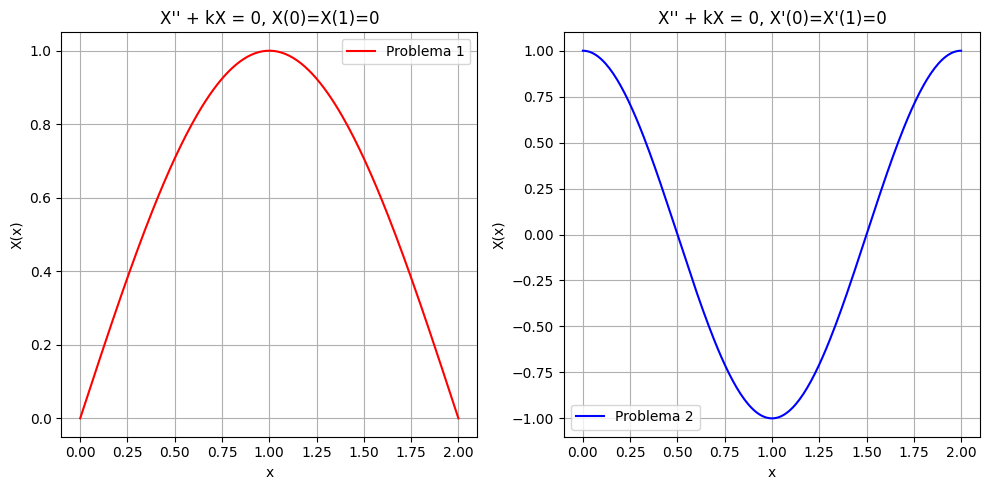

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xx, yy1, 'r', label='Problema 1')
plt.title("X'' + kX = 0, X(0)=X(1)=0")
plt.xlabel('x')
plt.ylabel('X(x)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xx, yy2, 'b', label='Problema 2')
plt.title("X'' + kX = 0, X'(0)=X'(1)=0")
plt.xlabel('x')
plt.ylabel('X(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()